<center>
  <img src="https://i.imgur.com/0ppeoME.png" width="750"/>
</center>

# 🩺 Are Medical Features Linked to Diabetes?

Doctors deal with a wide variety of patient data every day.  
Some patients are older, some have a higher-than-normal BMI, and others show concerning glucose levels.  
But the key question is: **Can we predict who is at risk of diabetes just by looking at this basic information?**

In this notebook, we aim to explore exactly that.  
We want to investigate whether there is a relationship between features like **Age**, **BMI**, and **Glucose** and the **Outcome** (whether or not someone has diabetes).

Step by step, we’ll examine and clean the data, visualize relationships between variables,  
and try to answer a crucial question: **Can the signs of diabetes be found in the numbers?**

This is more than just a data analysis —  
it's a story about **numbers that might help save lives.**


# 🧰 Setup and Imports

Before we dive into the analysis, let’s import the libraries and load the datasets.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Reading the dataset:Students Performance
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# 📋 A Quick Look at the Data

Before we begin exploring relationships between medical features and diabetes, it's essential to understand the dataset we're working with.  
How many records are there? What types of variables do we have? Are there signs of imbalance or missing values?

By taking a closer look at the shape and structure of the data, we prepare the ground for accurate analysis —  
because in medical research, **understanding your data is the first step toward uncovering the truth.**


### Preview of the Dataset       

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset overview     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset consists of **768 entries**, each representing a patient's medical record.  

At first glance, there are no missing values in the dataset — each feature has 768 non-null entries.  
However, as we’ll see in the cleaning section, some zero values in medical fields like *Glucose* or *BMI* may actually represent missing or invalid data.

All features in this dataset are **numeric**, either of type `int64` or `float64`.  
Specifically:

- Columns such as `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `Age`, and `Outcome` are stored as integers (`int64`).
- Columns like `BMI` and `DiabetesPedigreeFunction` are represented as floats (`float64`), which makes sense given they can include decimal values.

This uniformity simplifies data processing and visualization, allowing us to apply a wide range of statistical techniques.  
Also, since `Outcome` is a binary integer (0 or 1), it is perfectly suited for classification tasks.

This initial overview gives us a sense of the dataset’s structure and prepares us for deeper exploration.

###  Column Definitions

To better understand the dataset, let's briefly go through the meaning of each column:

- **Pregnancies**: Number of times the patient has been pregnant  
- **Glucose**: Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test  
- **BloodPressure**: Diastolic blood pressure (mm Hg)  
- **SkinThickness**: Thickness of the triceps skin fold (mm)  
- **Insulin**: 2-hour serum insulin level (mu U/ml)  
- **BMI**: Body Mass Index — a measure of weight relative to height (kg/m²)  
- **DiabetesPedigreeFunction**: A function which scores the likelihood of diabetes based on family history  
- **Age**: Age of the patient (in years)  
- **Outcome**: Target variable — 1 indicates diabetes, 0 indicates no diabetes


### Descriptive Statistics

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This table provides a statistical summary of the dataset’s numeric features.  
We can observe key metrics such as the **mean**, **standard deviation**, and various percentiles (25%, 50%, 75%) for each column.

Some initial observations:

- Several features, including **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI**, have a **minimum value of 0**, which is medically unrealistic and likely indicates missing or invalid data.
  For example, a BMI or blood pressure of 0 is not physiologically possible, so we’ll address these issues in the data cleaning step.
- The average age of patients is around **33 years**, with values ranging from **21 to 81**, suggesting a wide age spread.
- The **Insulin** feature shows a **very high maximum value of 846**, while its 75th percentile is only 127. This indicates the presence of **outliers** or a **skewed distribution**.
- Similarly, the standard deviation of **SkinThickness** and **Insulin** is relatively high, pointing to considerable variation in those features.

Overall, these insights help us identify potential issues in the dataset and gain a better understanding of the data’s distribution.

###  Class Distribution of Outcome

In [6]:
counts =df['Outcome'].value_counts()
counts

Outcome
0    500
1    268
Name: count, dtype: int64

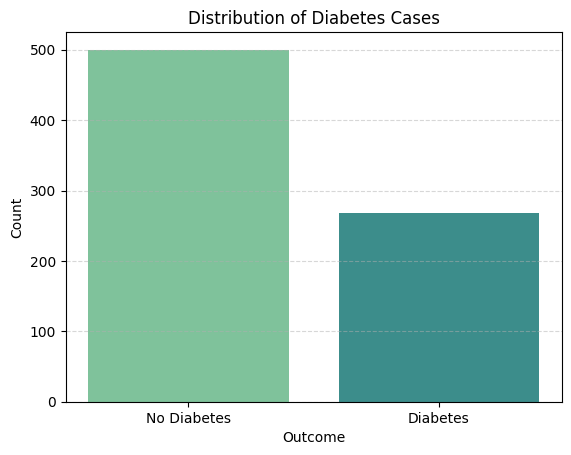

In [7]:
labels = ['No Diabetes', 'Diabetes']  # custom labels

plt.bar(labels, counts.values, color=['#7FC29B', '#3C8D8B'])
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The chart above shows the distribution of the target variable, **Outcome**, where:

- **No Diabetes (0)** cases: 500  
- **Diabetes (1)** cases: 268

This indicates a **class imbalance**, with significantly more non-diabetic cases than diabetic ones.  
Such imbalance can affect statistical interpretation and machine learning models, especially in classification tasks.

We'll keep this in mind as we move forward in our analysis.

# 🧹 Data Cleaning and Preparation

###  Check for Missing Values (Zero as Missing)

In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In this dataset, some medical features contain values of **0**, which are **not medically valid**.  
For example, a blood pressure or BMI of 0 is physiologically impossible.

We identified the following columns where zero likely indicates **missing data**:
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`

As shown above, these columns contain a significant number of zeros, especially `Insulin` (374 missing) and `SkinThickness` (227 missing).

In the next step, we'll replace these zeros with `NaN` to mark them as missing values and handle them properly.

In [9]:
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df[cols_with_zero].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [10]:
# Fill missing values with median
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

df[cols_with_zero].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

At this stage, we then filled  them using the **median** of each column

This method preserves the **central tendency** of the data without being overly influenced by **outliers**.

After imputation, we confirmed that no missing values remain.

All values are now filled — we're ready to move on to outlier detection.

###  Detect and Explore Outliers       

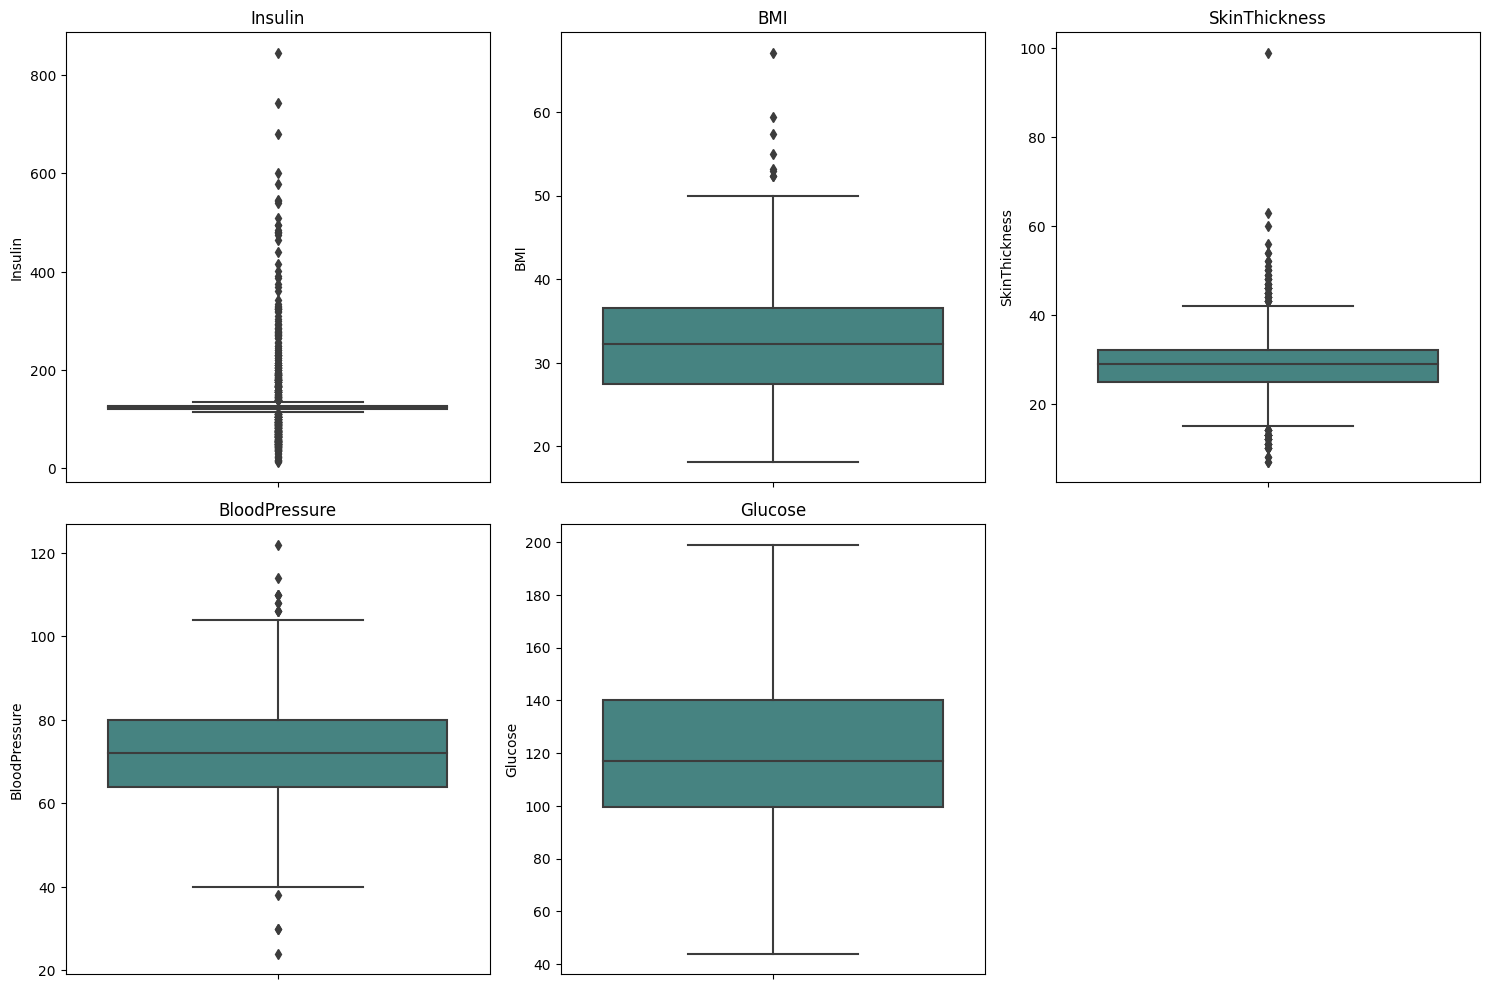

In [11]:
# Define columns we want to check for outliers
outlier_cols = ['Insulin', 'BMI', 'SkinThickness', 'BloodPressure', 'Glucose']

plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='#3C8D8B')
    plt.title(col)

plt.tight_layout()
plt.show()

To better understand the distribution of our numeric features and identify any extreme values, we **visualized** them using boxplots for a clearer understanding of their distribution.

Boxplots allow us to visually detect **outliers**, which are values that fall significantly outside the typical range of the data.

From the plots, we observe:

- **Insulin** shows a high number of outliers, with some values far above the upper whisker.
- **SkinThickness** and **BMI** also contain several outliers, though less extreme.
- **Glucose** and **BloodPressure** are relatively well distributed but still include some borderline cases.

Since they can affect analysis, we'll handle them in the next step using the IQR method.

### Handling Outliers (IQR Method)

In [12]:
# Replace outliers with median values
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])


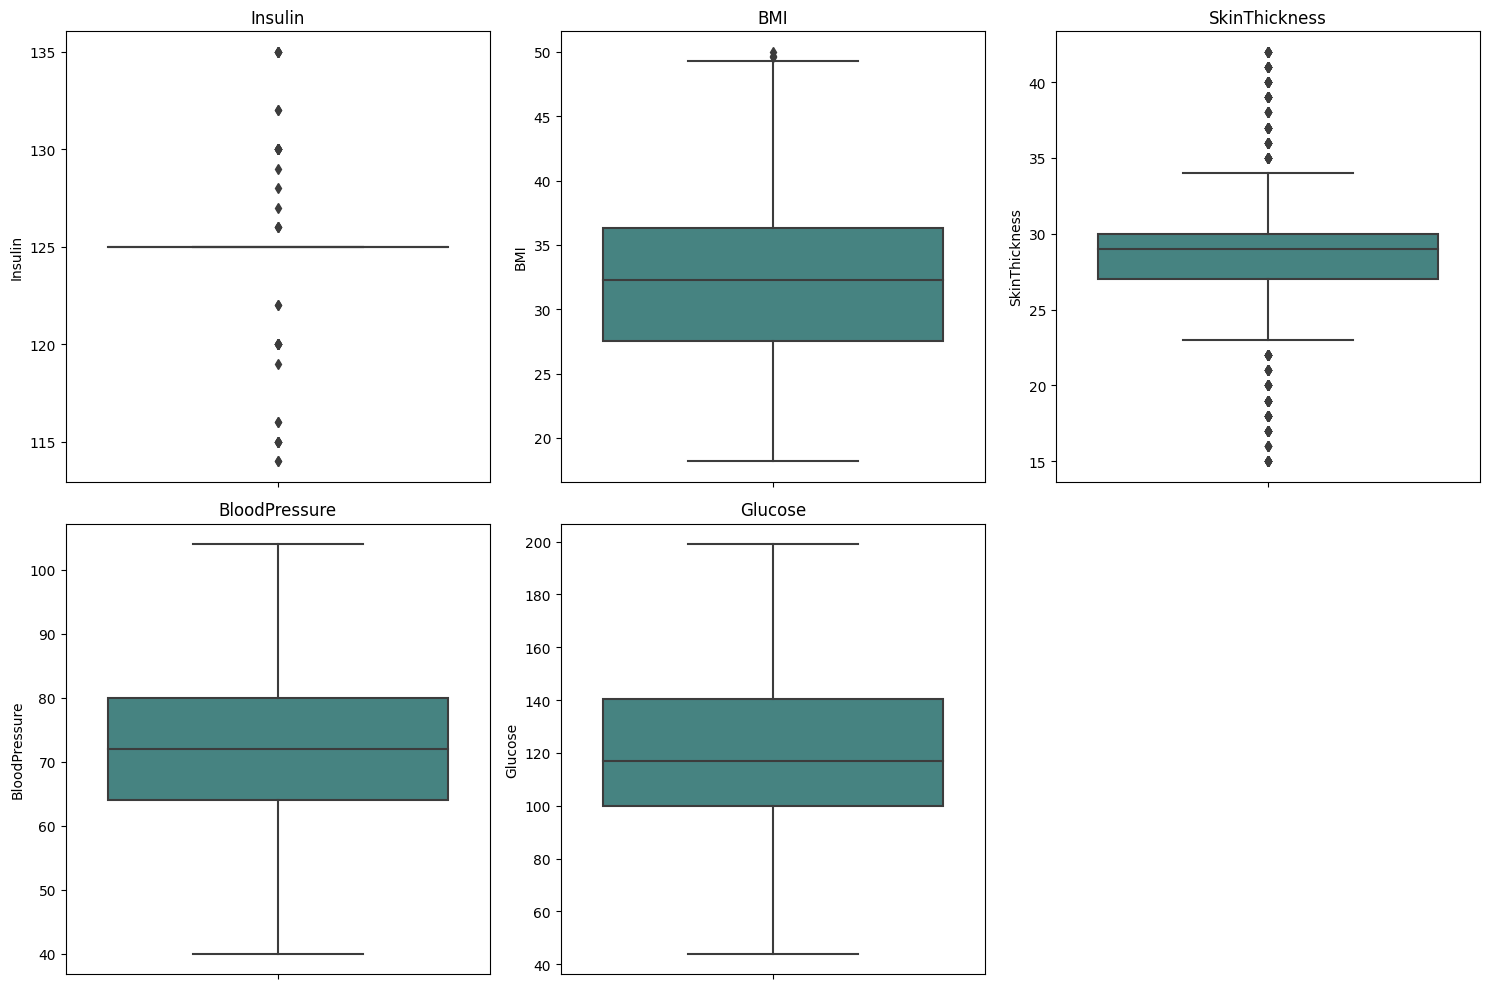

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='#3C8D8B')
    plt.title(col)

plt.tight_layout()
plt.show()

As previously mentioned, we handled the outliers using the IQR method. The updated boxplots show a cleaner distribution with extreme values successfully removed.

# 🔍 Exploring Correlation with Diabetes

## 🔗 Correlation Matrix

To explore the relationships between different features and identify which ones are most strongly associated with diabetes, we'll compute the correlation matrix.

This will help us:

- Detect features that have strong linear relationships with the **Outcome** variable.
- Understand potential multicollinearity among the features.
- Identify patterns that could be useful for modeling or feature selection.

We'll visualize the correlations using a heatmap for better interpretation.

In [14]:
# Compute the correlation matrix from cleaned data
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.180575,0.118117,-0.009171,0.042079,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.208368,0.126562,0.072931,0.228111,0.137327,0.266909,0.492782
BloodPressure,0.180575,0.208368,1.000000,0.142738,0.018162,0.263335,0.012825,0.314275,0.166424
SkinThickness,0.118117,0.126562,0.142738,1.000000,0.003986,0.422464,0.053019,0.081546,0.178505
Insulin,-0.009171,0.072931,0.018162,0.003986,1.000000,-0.003349,-0.050392,0.016910,0.026280
BMI,0.042079,0.228111,0.263335,0.422464,-0.003349,1.000000,0.127708,0.049425,0.300793
DiabetesPedigreeFunction,-0.033523,0.137327,0.012825,0.053019,-0.050392,0.127708,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.314275,0.081546,0.016910,0.049425,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166424,0.178505,0.026280,0.300793,0.173844,0.238356,1.000000


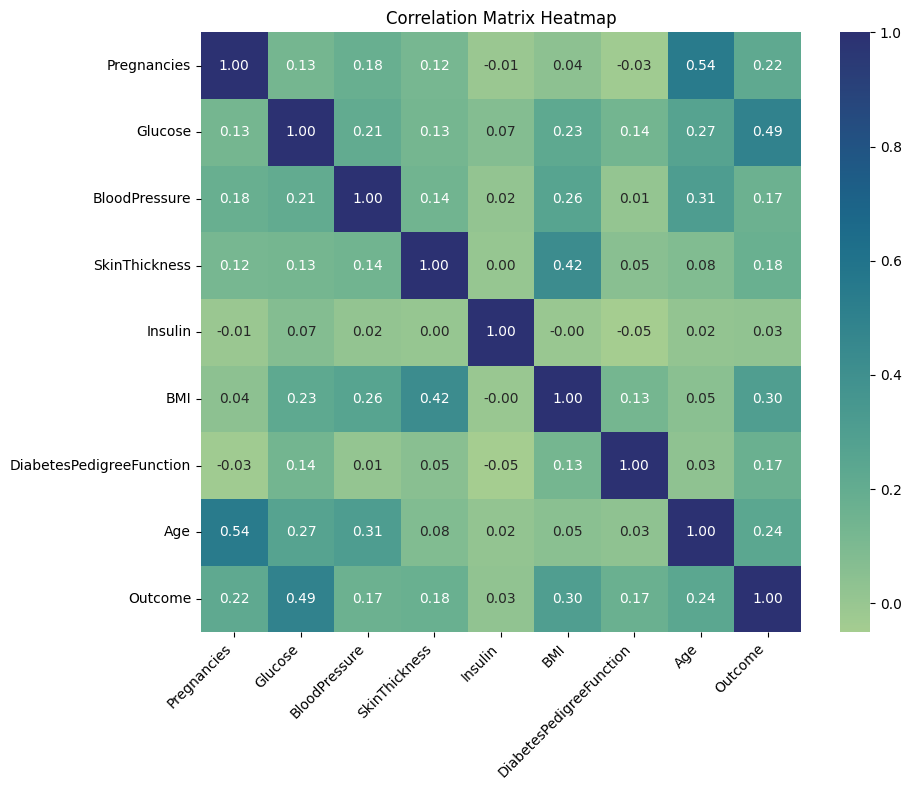

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

- **Glucose** shows the strongest positive correlation with the **Outcome** variable (`0.49`). This suggests that individuals with higher glucose levels are more likely to have diabetes.
- Other features such as **BMI** (`0.31`), **Age** (`0.24`), and **Pregnancies** (`0.22`) also have moderate positive associations with diabetes risk.
- **Insulin**, **SkinThickness**, and **BloodPressure** exhibit weaker correlations with **Outcome** (`≤ 0.21`), indicating they may be less directly predictive on their own.

Some features also exhibit moderate correlations with each other. For instance, **SkinThickness** and **BMI** (0.54), **Glucose** and **Insulin** (0.42), and **BloodPressure** and **BMI** (0.28) show notable associations.

> ⚠️ **Note:** Correlation does not imply causation — these values serve as guidance for identifying influential features, but further analysis (e.g., feature importance from modeling) is required to confirm their predictive power.

## 📊 Visual Comparison

To better understand how each feature behaves with respect to diabetes status (`Outcome`), we’ll use visualizations such as **boxplots** and **violin plots**.

These plots help us:

- Compare the distribution of each feature for diabetic vs. non-diabetic individuals.
- Identify whether certain features (e.g., BMI or Glucose) tend to be higher or lower in diabetic patients.
- Detect potential differences in variability and outliers between the two groups.

Let’s start by visualizing some key features against the `Outcome`.

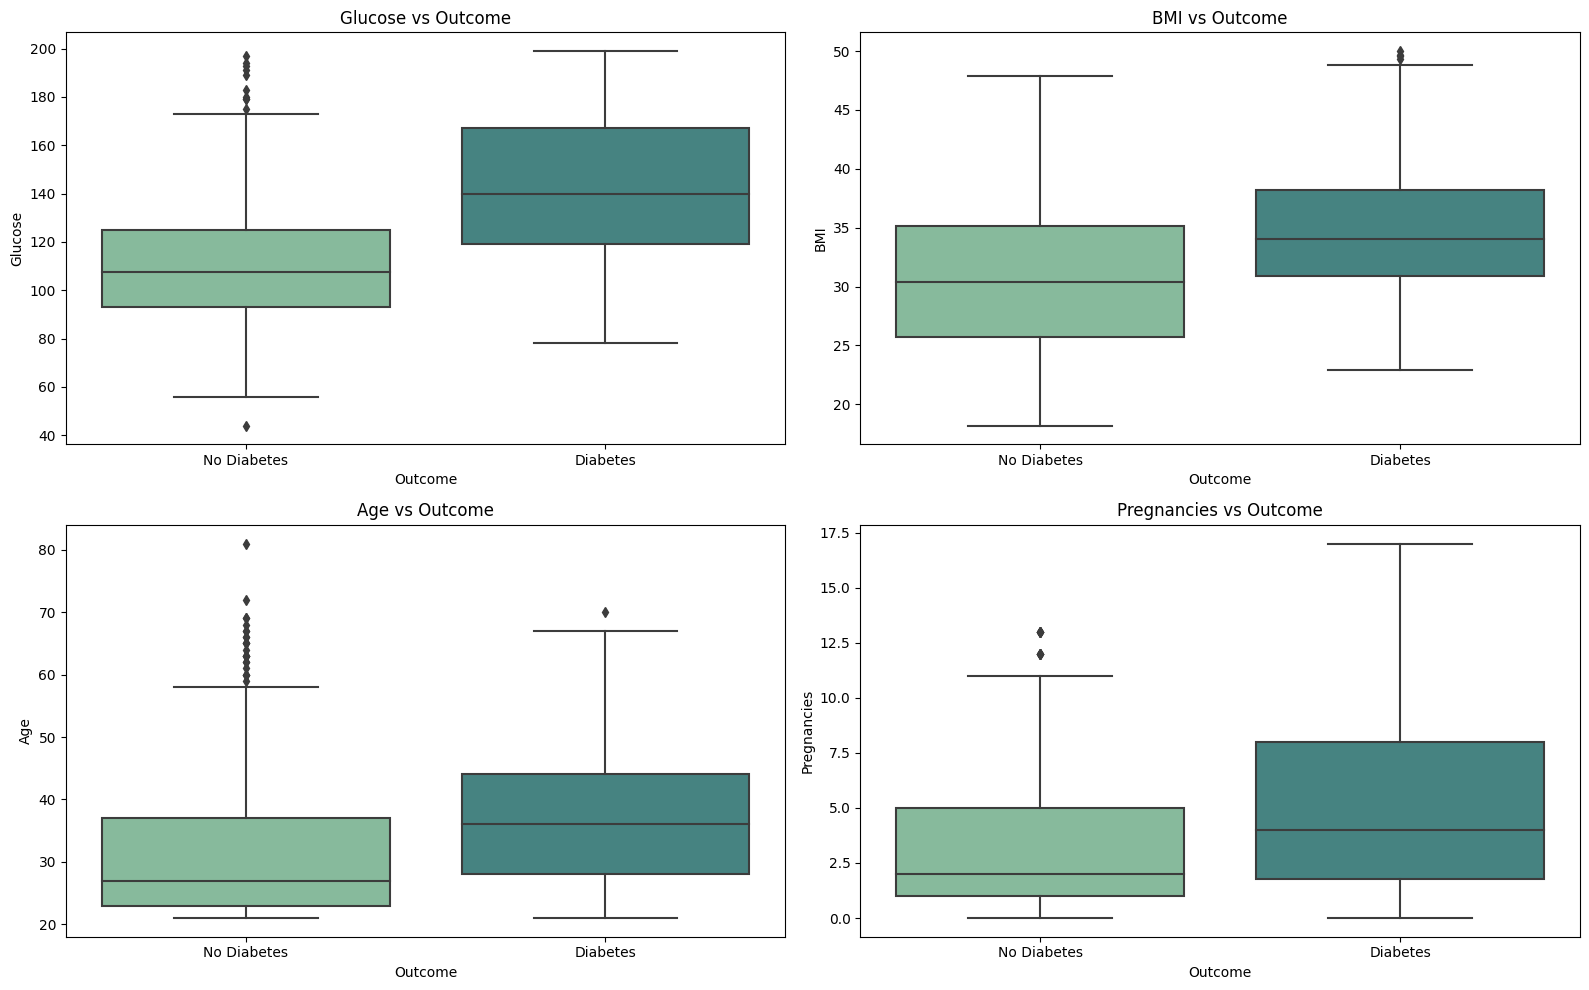

In [16]:
df_viz = df.copy()
df_viz['Outcome'] = df_viz['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

custom_palette = {'No Diabetes': '#7FC29B', 'Diabetes': '#3C8D8B'}
order = ['No Diabetes', 'Diabetes']
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']

plt.figure(figsize=(16, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=col, data=df_viz, palette=custom_palette, order=order)
    plt.title(f'{col} vs Outcome')

plt.tight_layout()
plt.show()

- **Glucose:** Diabetic individuals show significantly higher glucose levels. This supports the correlation analysis where glucose had the strongest association with diabetes.

- **BMI:** People with diabetes tend to have a higher BMI, suggesting a potential link between obesity and diabetes.

- **Age:** The diabetic group appears slightly older on average, though with some overlap between the groups.

- **Pregnancies:** Diabetic individuals show a slightly higher number of pregnancies, but the distributions overlap considerably.

> These visual patterns confirm the earlier correlation insights and offer a more intuitive understanding of how key features differ between diabetic and non-diabetic individuals.

 # 🧠 Final Observations

In this notebook, we explored how several common medical features are related to diabetes.

- **Glucose** showed the strongest correlation with diabetes, followed by **BMI**, **Age**, and **Pregnancies**.
- Visual comparisons supported these findings, revealing that diabetic individuals tend to have higher **glucose levels** and **BMI**.
- Notable inter-feature relationships (e.g., between **BMI** and **SkinThickness**) were also observed, which may indicate shared physiological traits.

While **correlation does not imply causation**, these insights provide valuable guidance for future analyses.

---
**Next Steps:** 

A logical next step would be **building a classification model** (e.g., logistic regression or random forest) to evaluate how well these features can **predict diabetes**.
